# **핸즈온 머신러닝 CHAP 4 p157~202** 

0321 월요일 과제 [개념]

### **4.1 선형 회귀**

**식 4-1** 선형 회귀 모델의 예측

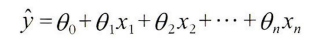

* yhat: 예측값, n: 특성의 수, xi: i번째 특성값, θj: j번째 모델 파라미터(편향 θ0과 특성의 가중치 θ₁,θ₂, …, θn 포함) 



**식 4-2** 선형 회귀 모델의 예측(벡터 형태)

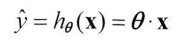

* θ는 편향 θ0과 θ₁에서 θn까지의 특성 가중치를 담은 모델의 파라미터 벡터
* x는 x0에서 xn까지 담은 샘플의 특성 벡터. x0는 항상 1
* hθ는 모델 파라미터 θ를 사용한 가설 함수

**식 4-3** 선형 회귀 모델의 MSE 비용 함수

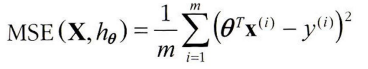

* 간략하게 표현하면 MSE(θ)

#### 4.1.1 정규방정식

**식 4-4** 정규방정식

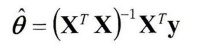

* θhat은 비용 함수를 최소화하는 θ값
* y는 y^(1)부터 y^(m)까지 포함하는 타깃 벡터

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X +np.random.randn(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)), X] # 모든 샘플에 x0=1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # np.linalg.inv(): 역행렬 계산, np.dot(): 벡터 내적

In [3]:
theta_best

array([[3.5493616 ],
       [3.31015369]])

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.5493616 ],
       [10.16966899]])

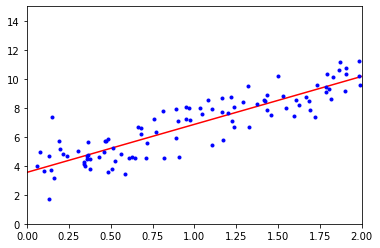

In [9]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.5493616]), array([[3.31015369]]))

In [11]:
lin_reg.predict(X_new)

array([[ 3.5493616 ],
       [10.16966899]])

  LiearRegression 클래스는 scipy.linalg.lstsq()를 기반으로 한다.

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.5493616 ],
       [3.31015369]])

In [13]:
np.linalg.pinv(X_b).dot(y) # θhat = X^(+) * y 계산 (X^(+)는 X의 유사역행렬)

array([[3.5493616 ],
       [3.31015369]])

* 유사역행렬은 특이값 분해(SVD)를 사용해서 계산

**SVD**: 훈련 세트 행렬 X를 3개의 행렬 곱셈 UΣV^T로 분해함.(numpy.linalg.svd())

  * 유사역행렬은 X^(+) = VΣ^(+)U^T로 계산
  * Σ^(+)를 계산하기 위해 Σ를 구하고 낮은 임곗값보다 작은 모든 수를 0으로 치환 → 0이 아닌 모든 값을 역수로 치환 → 만들어진 행렬 전치
  * 극단적인 경우 처리 가능. 정규방정식보다 효율적.
  cf) m<n이거나 특성이 중복되어 행렬 X^TX의 역행렬이 없다면 (특이행렬) 정규방정식은 없다.

#### 4.1.2 계산 복잡도

* 역행렬을 계산하는 계산 복잡도는 일반적으로 O(n^2.4)~O(n^3)사이
* 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 O(n^2)

### **4.2 경사 하강법**

  비용 함수를 최소화하기 위해 반복해서 파라미터 조정

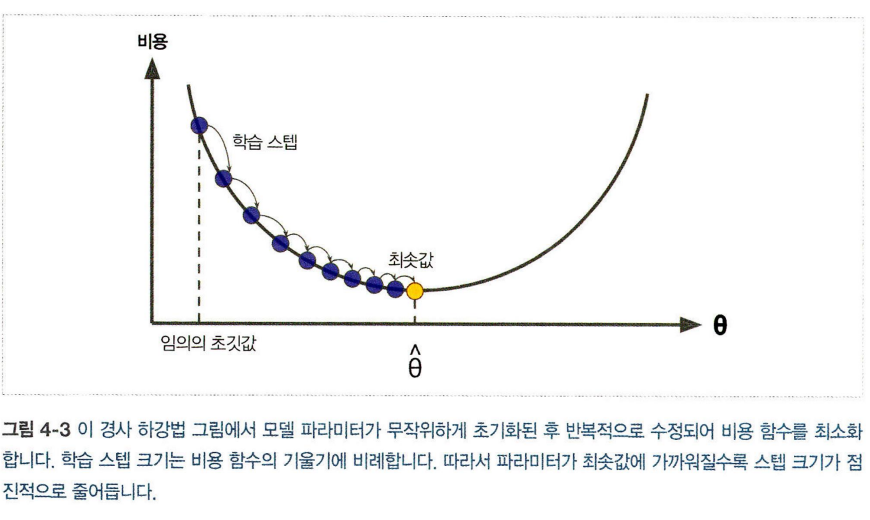

* 중요한 파라미터는 학습률(learning rate) 하이퍼 파라미터로 결정되는 스텝의 크기
* 경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 해야 함(StandardScaler사용 등). 그림 4-7 참고.

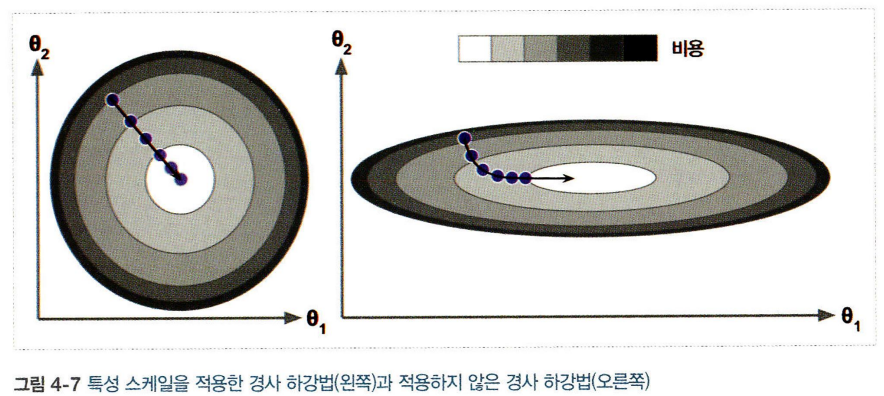

#### 4.2.1 배치 경사 하강법

**편도함수**: θj가 변경될 때 비용함수가 얼마나 바뀌는지 계산. 식 4-5 참고.\
**gradient 벡터**: 비용 함수의 (모델 파라미터마다 한 개씩인) 편도함수를 담고 있음. 식 4-6 참고.

**식 4-5** 비용 함수의 편도함수

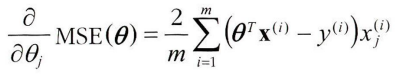

**식 4-6** 비용 함수의 gradient 벡터

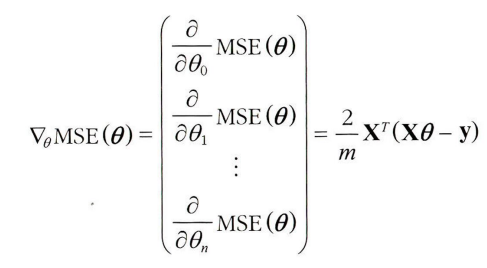

**식 4-7** 경사 하강법의 스텝

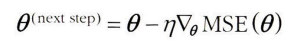

In [14]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [15]:
theta

array([[3.5493616 ],
       [3.31015369]])

* 적절한 학습률을 찾기 위해 그리드 탐색 사용.
* 반복횟수를 아주 크게 지정하고 gradient 벡터가 아주 작아질 때까지 (=벡터의 노름이 ε (허용오차)보다 작아지면) 

#### 4.2.2 확률적 경사 하강법

매 스텝에서 한 개의 샘플을 무작위로 선택하고 하나의 샘플에 대한 gradient 계산 \
[장] 매 반복마다 다뤄야 할 데이터가 매우 적어서 빠름. 큰 훈련 세트도 훈련 가능.\
[단] 배치 경사 하강법보다 불안정. 
  * 학습률을 점진적으로 감소. 

In [16]:
n_epchs = 50
t0, t1 = 5,50 # 학습 스케줄(매 반복에서 학습률을 결정하는 함수) 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epchs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta -  eta * gradients

**epoch**: 한 반복에서 m번 되풀이 되는데, 이때 각 반복을 의미함.

In [17]:
theta

array([[3.55592638],
       [3.32996877]])

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

* max_iter = 1000: 최대 1000번 에포크 동안 실행. 
* tol = 1e-3: 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행.
* eta0 = 0.1: 학습률 0.1

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.55502694]), array([3.33371166]))

#### 4.2.3 미니배치 경사 하강법

미니배치라 부르는 임의의 작은 샘플 세트에 대해 gradient 계산. 행렬 연산에 최적화.

### **4.3 다항 회귀**

비선형 데이터 학습에 용이.

In [20]:
# 2차 방정식으로 비선형 데이터 생성

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.81229312])

In [22]:
X_poly[0]

array([0.81229312, 0.65982012])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.09170669]), array([[1.03739253, 0.49982537]]))

* 특성 사이의 관계를 찾을 수 있음. PolynomialFeatures는 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문.

### **4.4 학습 곡선**

* 모델이 데이터에 과대적합 또는 과소적합되었는지 알아보는 방법 중 하나.
* 훈련 세트와 검증 세트의 모델 성틍을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타냄.

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [],[]
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='훈련 세트')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='검증 세트')

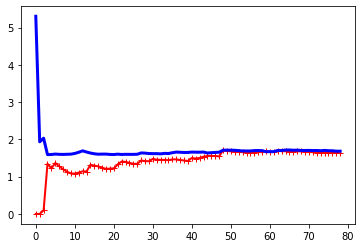

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

대표적인 과소 적합 모델의 양상
* 훈련 데이터
  * 그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 두 개의 샘플이 있을 때는 완벽하게 작동. but 훈련 세트에 샘플이 추가되면 잡음 발생.
  * 비선형이기 때문에 훈련 데이터를 완벽히 학습하는 것은 불가능.
* 검증 데이터
  * 모델이 적은 수의 훈련 샘플로 훈련되었기 때문에 초기 검증 오차가 매우 큰 편. 훈련 샘플이 추가됨에 따라 검증 오차가 서서히 감소함.
  * 선형 회귀 직선은 데이터를 잘 모델링할 수 없으므로 훈련 세트의 그래프와 가까워짐. \
  
[sol] 복잡한 모델을 사용하거나 더 나은 특성을 선택.

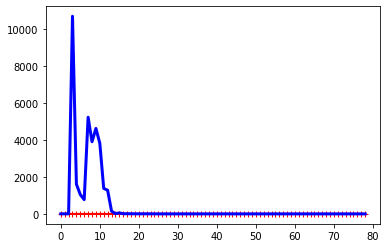

In [35]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                                  ('lin_reg', LinearRegression()),
                                  ])

plot_learning_curves(polynomial_regression, X, y)

* 훈련 데이터의 오차가 선형 회귀 모델보다 낮음.
* 두 곡선 사이에 공간 → 훈련 데이터의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻. 과대 적합 모델의 특징. \

[sol] 검증 오차가 훈련 오차에 근접할 때까지 많은 훈련 데이터 추가

### **4.5 규제가 있는 선형 모델**

자유도를 줄여서 과대적합을 감소시키는 방법. 
* 다항 회귀 모델의 경우 가장 간단한 방법은 다항식의 차수를 감소시키는 것. 
* 선형 회귀 모델의 경우 모델의 가중치를 제한하는 것.
  * 규제항이 비용함수에 추가(훈련하는 동안에만).
  * 훈련 후 모델의 성능은 규제가 없는 성능 지표로 평가.


#### 4.5.1 릿지 회귀

* α가 커질수록 가중치가 작아지고 수평선에 가까워짐.

**식 4-8** 릿지 회귀의 비용 함수


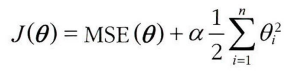

* 편향 θ0는 규제되지 않음.
* 경사 하강법에 적용하려면 MSE gradient 벡터에 α**w**를 더하면 됨.
* 입력 특성의 스케일에 민감하기 때문에 데이터의 스케일을 맞추는 것이 중요.

**식4-9** 릿지 회귀의 정규방정식

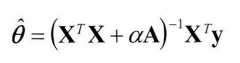

In [36]:
# 정규방정식 사용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.17589114]])

In [37]:
# 확률적 경사 하강법 사용
sgd_reg = SGDRegressor(penalty='l2') # l2규제 사용
sgd_reg.fit(X, y.ravel()) # ravel(): 다차원 배열을 1차원으로
sgd_reg.predict([[1.5]])

array([5.16114772])

#### 4.5.2 라쏘 회귀

* α가 커질수록 가중치가 작아지고 **0이 될 수도 있음.**
* 덜 중요한 특성의 가중치를 제거하여 특성 선택하고 희소 모델(sparse model)을 만듦.
* θi=0(i=1,2,3,…,n)에서 미분 불가. 서브그레이디언트 벡터 g를 사용해서 경사 하강법 적용.

**식 4-10** 라쏘 회귀의 비용 함수

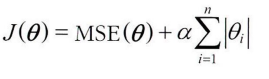

**식 4-11** 서브그레이디언트 벡터 g

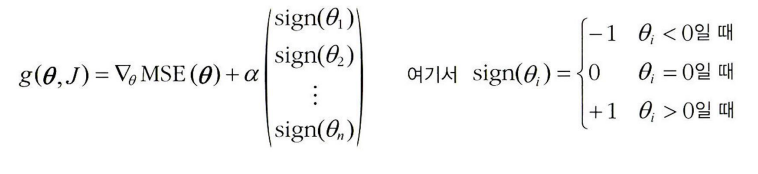

* 서브그레이디언트 벡터는 미분이 불가능한 지점 근방 gradient들의 중간값으로 생각할 수 있음.

In [38]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) # = SGDRegressor(panalty='l1')
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.13606268])

#### 4.5.3 엘라스틱넷

* 릿지 회귀와 라쏘 회귀를 절충한 모델.
* 규제항은 릿지와 회귀의 규제항의 합(혼합 비율r을 사용해 혼합 정도 조절) \
ex) r=0 (릿지회귀), r=1(라쏘회귀) \

※ ElasticNet 클래스의 l1_ratio를 통해서 조절하는 것은 주의 (Lasso클래스는 l1_ratio=1.0과 같지만 l1_ratio=0의 ElasticNet과 Ridge 클래스는 다르기 때문)

**식 4-12** 엘라스틱넷 비용 함수

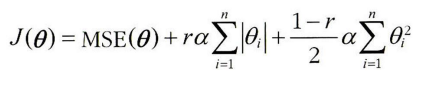

* 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 라쏘보다 엘라스틱넷 선호.

In [39]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.1346559])

#### 4.5.4 조기 종료

**조기 종료 early stopping** : 검증 에러가 최소값에 도달하면 훈련을 중지한다. \
  확률적 경사 하강법이나 미니배치 경사 하강법에서는 곡선이 매끄럽지 않아 확인이 어려움. 해결책은 검증 에러가 일정 시간 동안 최소값보다 클 때 학습을 멈추고 검증 에러가 최소였을 때의 모델 파라미터로 돌리는 것.

In [42]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [43]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# 데이터 준비
poly_scaler = Pipeline([
                        ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
                        ('std_scaler', StandardScaler())
  ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, # warm_start=True: fit() 메서드가 호출될 때 이전 모델 파라미터에서 훈련을 이어간다.
                       penalty=None, learning_rate='constant', eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train) # 훈련을 이어서 진행합니다.
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

### **4.6 로지스틱 회귀**

샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용되는 기법.

#### 4.6.1 확률추정

**식 4-13** 로지스틱 회귀 모델의 확률 추정(벡터 표현식)

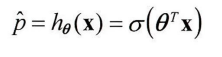

* σ(·): 0과 1사이의 값을 출력하는 시그모이드 함수 
  * σ(t) = 1/ (1+exp(-t))
    * σ(t)<0.5 → 음성 클래스
    * σ(t)≥0.5 → 양성 클래스

#### 4.6.2 훈련과 비용 함수

양성 샘플(y=1)에 대해서는 높은 확률을 추정하고 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 θ를 찾는 것이 목적.

**식 4-16** 하나의 훈련 샘플에 대한 비용 함수

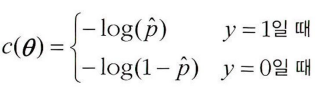

* t가 0에 가까워지면 -log(t) ↑
  * 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가.
  * 음성 샘플을 1에 가까운 확률로 추정하면 비용이 크게 증가.
  * t가 1에 가까우면 -log(t)는 0에 가까워짐. 기대한 대로 음성 샘플의 확률을 0에 가깝게 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워짐.

**식 4-17** 로지스틱 회귀의 비용 함수(로그 손실)

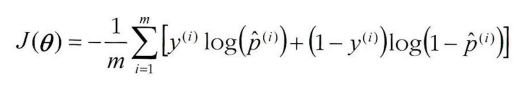

이 비용 함수의 j번째 모델 파라미터 θj에 대해 편미분을 하면 식 4-18과 같아진다.

**식 4-18** 로지스틱 비용 함수의 편도함수

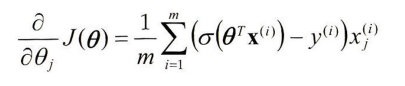

#### 4.6.3 결정 경계

In [44]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [46]:
X = iris['data'][:,3:] # 꽃잎의 너비
y = (iris['target']==2).astype(np.int64) # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [47]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

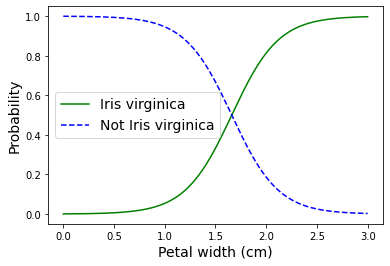

In [50]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris virginica')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)

* 꽃잎 너비가 2cm이상인 꽃은 Iris-Virginica라고 강하게 확신.
* 반면 1cm 아래면 Iris-Virginica가 아니라고 강하게 확신.

In [51]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

#### 4.6.4 소프트맥스 회귀

다른 말로는 다항 로지스틱 회귀. 

**식 4-19** 클래스 k에 대한 소프트맥스 점수

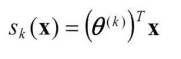

**식 4-20** 소프트맥스 함수

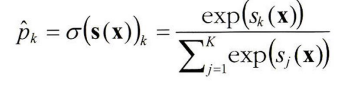

* K: 클래스 수
* S(x): 샘플 x에 대한 각 클래스 점수를 담은 벡터
* σ(S(x))_k: 샘플 x에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정 확률.

**식 4-21** 소프트맥스 회귀 분류기의 예측

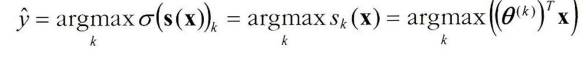

* argmax 연산은 함수를 최대화하는 변수의 값을 반환.
* 소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측. (상호 배타적인 클래스에서만 사용)

**식 4-22** 크로스 엔트로피 비용 함수

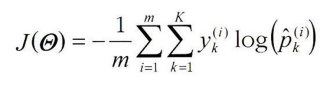

* 크로스 엔트로피 비용함수를 최소화하여 타깃 클래스에 대한 낮은 확률을 예측하는 모델을 억제함. * 크로스 엔트로피는추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 사용됨.
* y_k^(i)는 i번째 샘플이 클래스 k에 속할 타깃 확률. 샘플이 클래스에 속하는지 여부에 따라 1 or 0

**식 4-23** 클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터

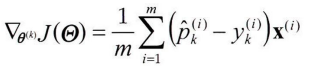

In [52]:
# LogisticRegression은 클래스가 둘 이상일 때 OvA 전략 사용
# multi_class 매개변수 조절하여 소프트맥스 회귀 사용 가능

X = iris['data'][:,(2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10) # C: 규제 강도
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [53]:
softmax_reg.predict([[5,2]])

array([2])

In [55]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

* 94.2%의 확률로 클래스2(Iris-Virginica)
* 5.8%의 확률로 Iris-Versicolor

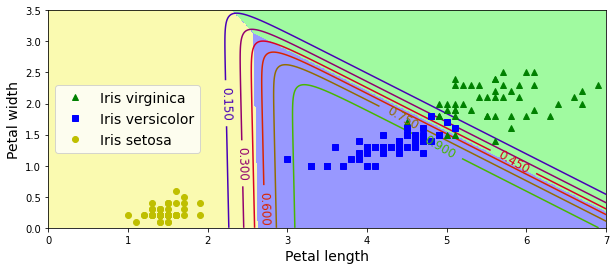

In [57]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()